In [ ]:
Task 1:
This assignment is for visualization using Matplotlib 
1)Create a pie charte representing Male Female ratio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt

In [4]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanicDF = pd.read_csv(url)
titanicDF.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanicGender = titanicDF.groupby('sex')
labelGenderValues = list(titanicGender.describe().index)
labelGenderValues

['female', 'male']

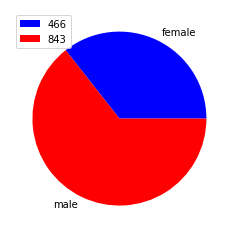

In [6]:
plt.pie(titanicGender['sex'].count(), labels= labelGenderValues, colors='br')
plt.legend(titanicGender['sex'].count(), loc='upper left')
plt.show()

In [ ]:
2 Create the scatterplot with the Fare paid and the Age, differ the plot color by Gender

In [7]:
titanicDF2_male = titanicDF[titanicDF.sex=='male']
titanicDF2_female = titanicDF[titanicDF.sex=='female']

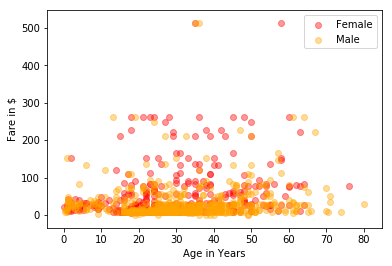

In [8]:
plt.scatter('age', 'fare', c='red', alpha=0.4, label='Female', data=titanicDF2_female)
plt.scatter('age', 'fare', c='orange', alpha=0.4, label='Male', data=titanicDF2_male)
plt.ylabel('Fare in $')
plt.xlabel('Age in Years')
plt.legend(frameon=True)

In [ ]:
Task 2:
It happens all the time: someone gives you data containing malformed strings, Python, list and missing data. How do you tidy it up so you can get on with the analysis?
Take this monstrosity as the DataFrame to use in the following puzzles: 
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', '

In [10]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})

In [ ]:
1) Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [11]:
df_index = df.FlightNumber.index.values
df_index

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
for i in df_index:
    print(df.loc[0, 'FlightNumber'] + 10 * i)

10045.0
10055.0
10065.0
10075.0
10085.0


In [13]:
df.FlightNumber

0    10045.0
1        NaN
2    10065.0
3        NaN
4    10085.0
Name: FlightNumber, dtype: float64

In [14]:
for i in df_index:
    df.loc[i, 'FlightNumber'] = df.loc[0, 'FlightNumber'] + 10 * i

In [15]:
df['FlightNumber'] = df.FlightNumber.astype(int)

In [16]:
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


In [ ]:
2. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame.

In [17]:
df2 = df.copy()

In [18]:
def splitTo(temp):
    return temp.split("_")[1]

In [19]:
def splitFrom(temp):
    return temp.split("_")[0]

In [21]:
dfFromCity = pd.DataFrame(df2['From_To'].apply(splitFrom))
dfToCity = pd.DataFrame(df2['From_To'].apply(splitTo))
dfFromCity.rename(columns={'From_To': 'From'}, inplace=True)
dfToCity.rename(columns={'From_To': 'To'}, inplace=True)

In [22]:
dfFromCity

,From
0,LoNDon
1,MAdrid
2,londON
3,Budapest
4,Brussels


In [23]:
dfToCity

,To
0,paris
1,miLAN
2,StockhOlm
3,PaRis
4,londOn


In [ ]:

3 Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [25]:
def initCapitalize(temp):
    return temp.capitalize()

In [26]:
dfFromCity = dfFromCity['From'].apply(initCapitalize)

In [27]:
dfToCity = dfToCity['To'].apply(initCapitalize)

In [28]:
dfFromCity

0      London
1      Madrid
2      London
3    Budapest
4    Brussels
Name: From, dtype: object

In [29]:
dfToCity

0        Paris
1        Milan
2    Stockholm
3        Paris
4       London
Name: To, dtype: object

In [ ]:

4. Delete the From_To column from df and attach the temporary DataFrame from the previous questions

In [30]:
df['From'] = dfFromCity
df['To'] = dfToCity
df.drop(columns='From_To', inplace=True)
df.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


In [ ]:
5. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN. 
Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [31]:
# find maximum number of columns

maxCols = 0

for i in df.RecentDelays:
    if (len(i) > maxCols):
        maxCols = len(i)

maxCols

3

In [32]:
# create an empty DataFrame with new column Names

tempColNames = list()
for i in range(maxCols):
    tempColNames.append('delay_' + str(i))

tempColNames

['delay_0', 'delay_1', 'delay_2']

In [33]:
# write a function to split list into space separated values
def returnString(temp):
    return str(temp).strip('[').strip(']').replace(",", " ")

In [34]:
# apply this function on a series
DFTemp2 = pd.DataFrame(df.RecentDelays.apply(returnString))
DFTemp2

,RecentDelays
0,23 47
1,
2,24 43 87
3,13
4,67 32


In [35]:
# split Series by space and convert it into a DataFrame
# Assign new values of dataframe into new columns of existing dataframe
# This assignment will work because indexes of two dataframes are same
df[tempColNames] = DFTemp2.RecentDelays.str.split(expand=True)
df

,FlightNumber,RecentDelays,Airline,From,To,delay_0,delay_1,delay_2
0,10045,"[23, 47]",KLM(!),London,Paris,23,47,None
1,10055,[],<Air France> (12),Madrid,Milan,None,None,None
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm,24,43,87
3,10075,[13],12. Air France,Budapest,Paris,13,None,None
4,10085,"[67, 32]","""Swiss Air""",Brussels,London,67,32,None


In [36]:
# drop old column
df.drop(columns='RecentDelays', inplace=True)

In [37]:
df

,FlightNumber,Airline,From,To,delay_0,delay_1,delay_2
0,10045,KLM(!),London,Paris,23,47,None
1,10055,<Air France> (12),Madrid,Milan,None,None,None
2,10065,(British Airways. ),London,Stockholm,24,43,87
3,10075,12. Air France,Budapest,Paris,13,None,None
4,10085,"""Swiss Air""",Brussels,London,67,32,None
